In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data frame
df=pd.read_csv('employee.csv')

In [3]:
# get the first five rows of the data frame
df.head()

,ID,FirstName,Surname,State,Department,Unit,Bank,Hire_Date,Salary,Bonus
0,1,A,Kurah,Abia,Admin.,Expenditure,Sub-Standard Bank,9/22/1997,4730542,40000
1,2,A.A.,Oke,Adamawa,Quality Control,Maintenance,Oasis Bank,10/31/1997,5911278,30000
2,3,Abayomi,Anumudu,Bauchi,Production,Maintenance,Atlantic Bank,11/24/1997,3234924,30000
3,4,Abdul,Gafaar,Bauchi,Human Resources,Payroll,Distressed Bank,2/12/1998,2149626,45000
4,5,Abdullai,Nwaonu,Imo,Human Resources,Payroll,Atlantic Bank,4/27/1998,2960872,45000


In [4]:
# get the bottom 5 rows
df.tail()

,ID,FirstName,Surname,State,Department,Unit,Bank,Hire_Date,Salary,Bonus
993,994,Yewande,Sidi,Jigawa,IT,Desktop Support,Oasis Bank,8/29/1996,2274823,55000
994,995,Yusuf,Akinruli,Gombe,R&D,Planning & Development,Money Doublers' Bank,10/17/1996,5564401,30000
995,996,Zachariah,Onwu,Nassarawa,IT,Desktop Support,Oasis Bank,11/15/1996,1430706,55000
996,997,Zainab,Akintoye,Katsina,Internal Control,Fraud Control,Money Doublers' Bank,2/10/1997,2486941,30000
997,998,Ziem,Tella,Zamfara,Dispatch,Courier,Distressed Bank,2/13/1997,3172873,30000


In [5]:
# copy this data frame, rename as data, then make ID as index
data=df
data.set_index('ID', inplace=True)


In [6]:
data.head()

,FirstName,Surname,State,Department,Unit,Bank,Hire_Date,Salary,Bonus
ID,,,,,,,,,
1,A,Kurah,Abia,Admin.,Expenditure,Sub-Standard Bank,9/22/1997,4730542,40000
2,A.A.,Oke,Adamawa,Quality Control,Maintenance,Oasis Bank,10/31/1997,5911278,30000
3,Abayomi,Anumudu,Bauchi,Production,Maintenance,Atlantic Bank,11/24/1997,3234924,30000
4,Abdul,Gafaar,Bauchi,Human Resources,Payroll,Distressed Bank,2/12/1998,2149626,45000
5,Abdullai,Nwaonu,Imo,Human Resources,Payroll,Atlantic Bank,4/27/1998,2960872,45000


In [7]:
# rename Hire_Date column to START DATE
data=data.rename(columns={'Hire_Date':'Start Date'})
data.head(1)

,FirstName,Surname,State,Department,Unit,Bank,Start Date,Salary,Bonus
ID,,,,,,,,,
1,A,Kurah,Abia,Admin.,Expenditure,Sub-Standard Bank,9/22/1997,4730542,40000


In [8]:
# check the data types of every column. 
data.dtypes

FirstName     object
Surname       object
State         object
Department    object
Unit          object
Bank          object
Start Date    object
Salary         int64
Bonus          int64
dtype: object

In [10]:
# change start date data type to date time
data['Start Date'] = pd.to_datetime(data['Start Date'])
data.dtypes

FirstName             object
Surname               object
State                 object
Department            object
Unit                  object
Bank                  object
Start Date    datetime64[ns]
Salary                 int64
Bonus                  int64
dtype: object

In [11]:
# compare unit and Bank column to see if they have the same values
data['Unit'].compare(data['Bank'])

,self,other
ID,,
1,Expenditure,Sub-Standard Bank
2,Maintenance,Oasis Bank
3,Maintenance,Atlantic Bank
4,Payroll,Distressed Bank
5,Payroll,Atlantic Bank
...,...,...
994,Desktop Support,Oasis Bank
995,Planning & Development,Money Doublers' Bank
996,Desktop Support,Oasis Bank


In [12]:
# remove unit column from the data set
data = data.drop(columns='Unit')

In [13]:
# print column to check if Unit column has been removed
data.columns

Index(['FirstName', 'Surname', 'State ', 'Department', 'Bank', 'Start Date',
       'Salary', 'Bonus'],
      dtype='object')

In [14]:
# check the number of rows and columns
data.shape

(998, 8)

In [15]:
# check if there is null values in any column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 1 to 998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FirstName   998 non-null    object        
 1   Surname     998 non-null    object        
 2   State       998 non-null    object        
 3   Department  998 non-null    object        
 4   Bank        998 non-null    object        
 5   Start Date  998 non-null    datetime64[ns]
 6   Salary      998 non-null    int64         
 7   Bonus       998 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 70.2+ KB


In [16]:
#or 
data.isna()

,FirstName,Surname,State,Department,Bank,Start Date,Salary,Bonus
ID,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False


In [17]:
# check for duplicate values
data.duplicated()

ID
1      False
2      False
3      False
4      False
5      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 998, dtype: bool

In [18]:
# remove any duplicate row from the data set
data.drop_duplicates()

,FirstName,Surname,State,Department,Bank,Start Date,Salary,Bonus
ID,,,,,,,,
1,A,Kurah,Abia,Admin.,Sub-Standard Bank,1997-09-22,4730542,40000
2,A.A.,Oke,Adamawa,Quality Control,Oasis Bank,1997-10-31,5911278,30000
3,Abayomi,Anumudu,Bauchi,Production,Atlantic Bank,1997-11-24,3234924,30000
4,Abdul,Gafaar,Bauchi,Human Resources,Distressed Bank,1998-02-12,2149626,45000
5,Abdullai,Nwaonu,Imo,Human Resources,Atlantic Bank,1998-04-27,2960872,45000
...,...,...,...,...,...,...,...,...
994,Yewande,Sidi,Jigawa,IT,Oasis Bank,1996-08-29,2274823,55000
995,Yusuf,Akinruli,Gombe,R&D,Money Doublers' Bank,1996-10-17,5564401,30000
996,Zachariah,Onwu,Nassarawa,IT,Oasis Bank,1996-11-15,1430706,55000


In [ ]:
# extract year, month,, quarter and day of week from start date column
data['year'] = data['Start Date'].dt.year 
data['Month'] = data['Start Date'].dt.month 
data['Quarter'] = data['Start Date'].dt.quarter 
data['Day'] = data['Start Date'].dt.day_name() 


In [41]:
data.head(1)

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER
ID,,,,,,,,,,,,
1,A,Kurah,Abia,Admin.,Sub-Standard Bank,1997-09-22,4730542,40000,1997,9,Monday,3


In [39]:
# capitalize all column names
data.columns = data.columns.str.upper()
data.columns

Index(['FIRSTNAME', 'SURNAME', 'STATE ', 'DEPARTMENT', 'BANK', 'START DATE',
       'SALARY', 'BONUS', 'YEAR', 'MONTH', 'DAY', 'QUARTER'],
      dtype='object')

In [40]:
data.head(2)

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER
ID,,,,,,,,,,,,
1,A,Kurah,Abia,Admin.,Sub-Standard Bank,1997-09-22,4730542,40000,1997,9,Monday,3
2,A.A.,Oke,Adamawa,Quality Control,Oasis Bank,1997-10-31,5911278,30000,1997,10,Friday,4


In [45]:
# show number of employees in all departmennt and create a pie chart for it
emp_no=data.value_counts('DEPARTMENT')
emp_no

DEPARTMENT
Human Resources     219
Finance             172
Admin.              140
Customer Service     69
IT                   69
Dispatch             66
Production           66
Quality Control      66
R&D                  66
Internal Control     65
dtype: int64

In [129]:
# or
data.groupby('DEPARTMENT').size()

DEPARTMENT
Admin.              140
Customer Service     69
Dispatch             66
Finance             172
Human Resources     219
IT                   69
Internal Control     65
Production           66
Quality Control      66
R&D                  66
dtype: int64

<AxesSubplot:>

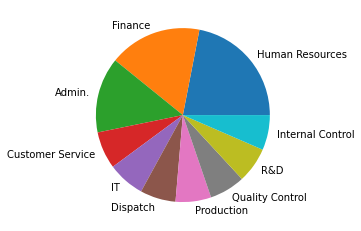

In [50]:
emp_no.plot(kind='pie', ylabel='')

<AxesSubplot:title={'center':'DEPARTMENTAL SALARY'}, xlabel='DEPARTMENT', ylabel='TOTAL SALARY'>

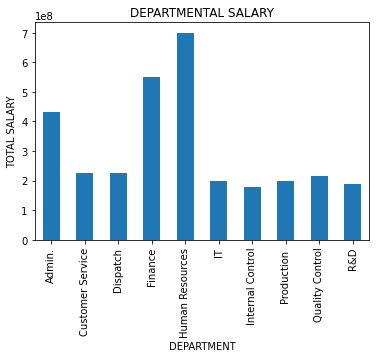

In [56]:
# calculate the total salary paid to every department and compare with a bar chat

Dept_salary = data.groupby('DEPARTMENT')['SALARY'].agg(sum)

Dept_salary.plot(kind='bar', ylabel='TOTAL SALARY', 
                 title='DEPARTMENTAL SALARY')

In [59]:
# create a new column name Total Income. then calculate the total salary and bonus

data['TOTAL INCOME'] = data['SALARY'] + data['BONUS']
data.head(2)


,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME
ID,,,,,,,,,,,,,
1,A,Kurah,Abia,Admin.,Sub-Standard Bank,1997-09-22,4730542,40000,1997,9,Monday,3,4770542
2,A.A.,Oke,Adamawa,Quality Control,Oasis Bank,1997-10-31,5911278,30000,1997,10,Friday,4,5941278


In [60]:
# also create a new column as average salary paid to employees
data['AVERAGE SALARY'] = data['SALARY'].agg(np.average)

In [62]:
data.head()

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
ID,,,,,,,,,,,,,,
1,A,Kurah,Abia,Admin.,Sub-Standard Bank,1997-09-22,4730542,40000,1997,9,Monday,3,4770542,4730542.0
2,A.A.,Oke,Adamawa,Quality Control,Oasis Bank,1997-10-31,5911278,30000,1997,10,Friday,4,5941278,5911278.0
3,Abayomi,Anumudu,Bauchi,Production,Atlantic Bank,1997-11-24,3234924,30000,1997,11,Monday,4,3264924,3234924.0
4,Abdul,Gafaar,Bauchi,Human Resources,Distressed Bank,1998-02-12,2149626,45000,1998,2,Thursday,1,2194626,2149626.0
5,Abdullai,Nwaonu,Imo,Human Resources,Atlantic Bank,1998-04-27,2960872,45000,1998,4,Monday,2,3005872,2960872.0


<AxesSubplot:title={'center':'DEPARTMENTAL INCOME'}, xlabel='DEPARTMENT', ylabel='INCOME'>

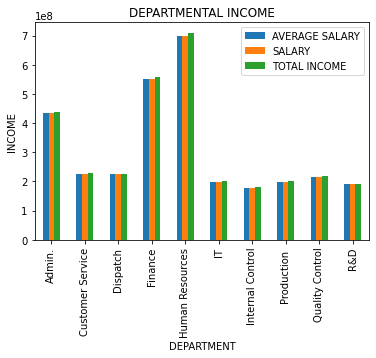

In [239]:
# create a bar chart with department, salary, total salary,and average salary
#you can use pivot table to reshape the data frame 
 
income_pivot = data.pivot_table(index="DEPARTMENT", 
        values=["SALARY","TOTAL INCOME", "AVERAGE SALARY"],
                                aggfunc=sum
                               )
income_pivot.plot(kind='bar', ylabel='INCOME', title='DEPARTMENTAL INCOME' )

In [91]:
# get the highest salary earner in IT department
IT = data[data['DEPARTMENT'] == "IT"]
highest=IT.sort_values(by='SALARY', ascending=False)
highest.head(1)

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
ID,,,,,,,,,,,,,,
883,Suleimon,Owolabi,Nassarawa,IT,Money Doublers' Bank,1996-08-29,5830206,55000,1996,8,Thursday,3,5885206,5830206.0


In [106]:
# get the loweset salary earner in IT
lowest = highest.tail(1)
lowest


,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
ID,,,,,,,,,,,,,,
871,Stanley,Coker,Katsina,IT,Last Bank Of Nigeria,1997-12-10,357396,55000,1997,12,Wednesday,4,412396,357396.0


In [107]:

# or
lowest_earner = IT.sort_values(by='SALARY', ascending=True)
lowest_earner.head(1) 

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
ID,,,,,,,,,,,,,,
871,Stanley,Coker,Katsina,IT,Last Bank Of Nigeria,1997-12-10,357396,55000,1997,12,Wednesday,4,412396,357396.0


In [122]:
#how many workers are there in Human Resources Department
hr=data[data['DEPARTMENT']=="Human Resources"]
hr.count()


FIRSTNAME         219
SURNAME           219
STATE             219
DEPARTMENT        219
BANK              219
START DATE        219
SALARY            219
BONUS             219
YEAR              219
MONTH             219
DAY               219
QUARTER           219
TOTAL INCOME      219
AVERAGE SALARY    219
dtype: int64

In [110]:
# what is the maximum salary paid
data['SALARY'].max()

6001580

In [112]:
max(data['SALARY'])

6001580

In [113]:
# what is the lowest salary paid
data['SALARY'].min()

260788

In [139]:
# we found a service tag of an employee with ID 200. please retrive the employee's info so that we can send it to him or her

data.loc[200]


FIRSTNAME                   Chidiebere
SURNAME                        onayimi
STATE                      Cross-River
DEPARTMENT                      Admin.
BANK              Money Doublers' Bank
START DATE         1997-07-04 00:00:00
SALARY                         1792418
BONUS                            40000
YEAR                              1997
MONTH                                7
DAY                             Friday
QUARTER                              3
TOTAL INCOME                   1832418
AVERAGE SALARY               1792418.0
Name: 200, dtype: object

In [251]:

# get the employees that joined HR department in 1997
it_hr=data[(data['DEPARTMENT']=="IT") & (data['YEAR']== 1997)]
it_hr.head(10)

,ID,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
74,75,adewunmi,Ilu,Benue,IT,Atlantic Bank,1997-05-30,3888746,55000,1997,5,Friday,2,3943746,3888746.0
131,132,Asha,Nugba,Gombe,IT,Last Bank Of Nigeria,1997-03-31,882432,55000,1997,3,Monday,1,937432,882432.0
196,197,Chibuike,Nwadialo,Anambra,IT,Last Bank Of Nigeria,1997-03-03,3281473,55000,1997,3,Monday,1,3336473,3281473.0
242,243,Damilola,Ero,Katsina,IT,Sub-Standard Bank,1997-10-08,4570241,55000,1997,10,Wednesday,4,4625241,4570241.0
304,305,Emmanuel,Mamman,Ekiti,IT,Atlantic Bank,1997-09-19,4765051,55000,1997,9,Friday,3,4820051,4765051.0
352,353,Foluso,Olajide,Kwara,IT,Distressed Bank,1997-05-13,4069138,55000,1997,5,Tuesday,2,4124138,4069138.0
387,388,Grateful,Olomolatan,Delta,IT,Distressed Bank,1997-05-02,5564445,55000,1997,5,Friday,2,5619445,5564445.0
392,393,Hamzat,Lawal,Rivers,IT,Sub-Standard Bank,1997-08-05,2045971,55000,1997,8,Tuesday,3,2100971,2045971.0
417,418,Ibraheem,Iafidon,Lagos,IT,Atlantic Bank,1997-02-03,1953955,55000,1997,2,Monday,1,2008955,1953955.0
431,432,Ifeoma,Agu,Jigawa,IT,Last Bank Of Nigeria,1997-06-18,790375,55000,1997,6,Wednesday,2,845375,790375.0


In [212]:
#create a line chart to show the total salary paid to every department each year
data_pivot=data.pivot_table(index="YEAR", values="SALARY",
                columns="DEPARTMENT",aggfunc=sum)

data_pivot

DEPARTMENT,Admin.,Customer Service,Dispatch,Finance,Human Resources,IT,Internal Control,Production,Quality Control,R&D
YEAR,,,,,,,,,,
1996,82083337,35481796,65346396,83912175,109393494,35115361,32337540,30215344,29929465,40941617
1997,237787533,114423864,85033940,249314764,354960331,95612734,81252269,97138140,131283936,98684136
1998,113189877,75358786,74706703,217727704,235772937,67278737,63954644,71179546,55314652,50603082


<AxesSubplot:title={'center':'Total Salary (1996 - 1998)'}, xlabel='YEAR'>

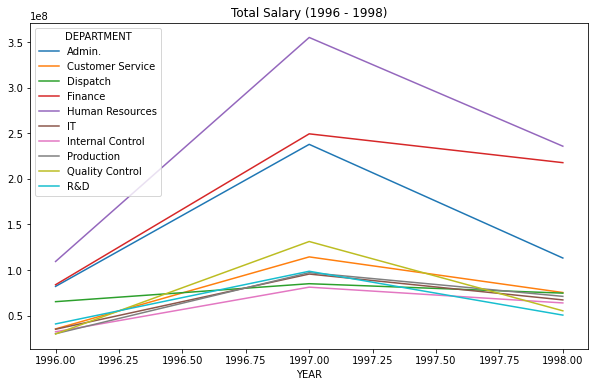

In [213]:
data_pivot.plot(kind='line', title='Total Salary (1996 - 1998)',
               figsize=(10,6))

In [180]:
# get the total salary paid to each department in 1997
data19997=data_pivot[data_pivot.index.isin([1997])]
data19997

DEPARTMENT,Admin.,Customer Service,Dispatch,Finance,Human Resources,IT,Internal Control,Production,Quality Control,R&D
YEAR,,,,,,,,,,
1997,237787533,114423864,85033940,249314764,354960331,95612734,81252269,97138140,131283936,98684136


<AxesSubplot:title={'center':'DEPARTMENTAL SALARY (1997)'}, xlabel='DEPARTMENT', ylabel='SALARY'>

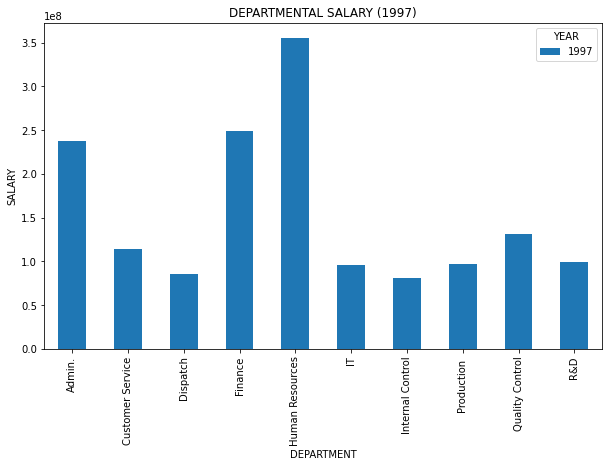

In [230]:
p1997=data19997.T
p1997.plot(kind='bar', ylabel="SALARY", 
              title="DEPARTMENTAL SALARY (1997)",
              figsize=(10,6))


<AxesSubplot:title={'center':'DEPARTMENTAL SALARY (1997)'}, xlabel='YEAR', ylabel='SALARY'>

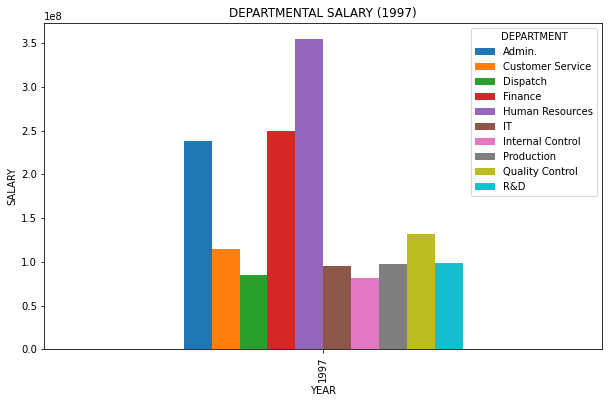

In [224]:
data19997.plot(kind='bar', ylabel="SALARY", 
              title="DEPARTMENTAL SALARY (1997)",
              figsize=(10,6))


In [243]:
# get the top 10 salary earners
top_ten=data.sort_values('SALARY', ascending=False)
top_ten.head(10)

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
ID,,,,,,,,,,,,,,
726,Oluwafolakemi,Ademola,Ekiti,Customer Service,Atlantic Bank,1997-07-07,6001580,30000,1997,7,Monday,3,6031580,6001580.0
356,Francis,Babalola,Katsina,Internal Control,Sub-Standard Bank,1997-11-24,5998834,30000,1997,11,Monday,4,6028834,5998834.0
202,Chidozie,Adeko,Kano,Customer Service,Sub-Standard Bank,1997-12-30,5990177,30000,1997,12,Tuesday,4,6020177,5990177.0
281,Ebele,Umoh,Enugu,Admin.,Atlantic Bank,1998-01-15,5969220,40000,1998,1,Thursday,1,6009220,5969220.0
956,Ume,Ago,Kogi,Dispatch,Sub-Standard Bank,1996-09-06,5969002,30000,1996,9,Friday,3,5999002,5969002.0
148,Bababunmi,Ijisesan,Borno,Customer Service,Last Bank Of Nigeria,1998-04-28,5960766,30000,1998,4,Tuesday,2,5990766,5960766.0
469,James,Ubong,Ekiti,Finance,Last Bank Of Nigeria,1997-11-06,5957610,50000,1997,11,Thursday,4,6007610,5957610.0
195,Chiamaka,Okhiona,Ekiti,Internal Control,Sub-Standard Bank,1996-11-08,5941004,30000,1996,11,Friday,4,5971004,5941004.0
206,Chigozie,Lemmy-Johnson,Anambra,Finance,Distressed Bank,1998-03-23,5935766,50000,1998,3,Monday,1,5985766,5935766.0


In [244]:
# get the bottom 10 salary earners
bottom_ten=data.sort_values('SALARY')
bottom_ten.head(10)

,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
ID,,,,,,,,,,,,,,
143,Ayodele,Nwelih,Cross-River,Admin.,Last Bank Of Nigeria,1998-03-16,260788,40000,1998,3,Monday,1,300788,260788.0
405,Ibhade,Omoyeni,Sokoto,Human Resources,Sub-Standard Bank,1996-10-01,324092,45000,1996,10,Tuesday,4,369092,324092.0
150,Babatunde,Bisah,Kogi,Internal Control,Oasis Bank,1998-05-22,324433,30000,1998,5,Friday,2,354433,324433.0
256,Danjuma,Ogbuefi,Rivers,R&D,Money Doublers' Bank,1998-03-26,325100,30000,1998,3,Thursday,1,355100,325100.0
198,Chidi,Izevbigie,Jigawa,Human Resources,Atlantic Bank,1997-03-28,325234,45000,1997,3,Friday,1,370234,325234.0
544,Lara,Busari,Delta,Finance,Atlantic Bank,1996-09-17,347672,50000,1996,9,Tuesday,3,397672,347672.0
565,Mary,Ado,Rivers,Customer Service,Oasis Bank,1998-03-10,350661,30000,1998,3,Tuesday,1,380661,350661.0
712,Oluseun,Afolayan,Rivers,Quality Control,Atlantic Bank,1998-04-29,351045,30000,1998,4,Wednesday,2,381045,351045.0
315,Ernest,Usen,Rivers,Finance,Oasis Bank,1997-01-22,352671,50000,1997,1,Wednesday,1,402671,352671.0


In [250]:
# reset the index
data.reset_index(inplace=True)
data.head()

,ID,FIRSTNAME,SURNAME,STATE,DEPARTMENT,BANK,START DATE,SALARY,BONUS,YEAR,MONTH,DAY,QUARTER,TOTAL INCOME,AVERAGE SALARY
0,1,A,Kurah,Abia,Admin.,Sub-Standard Bank,1997-09-22,4730542,40000,1997,9,Monday,3,4770542,4730542.0
1,2,A.A.,Oke,Adamawa,Quality Control,Oasis Bank,1997-10-31,5911278,30000,1997,10,Friday,4,5941278,5911278.0
2,3,Abayomi,Anumudu,Bauchi,Production,Atlantic Bank,1997-11-24,3234924,30000,1997,11,Monday,4,3264924,3234924.0
3,4,Abdul,Gafaar,Bauchi,Human Resources,Distressed Bank,1998-02-12,2149626,45000,1998,2,Thursday,1,2194626,2149626.0
4,5,Abdullai,Nwaonu,Imo,Human Resources,Atlantic Bank,1998-04-27,2960872,45000,1998,4,Monday,2,3005872,2960872.0


In [252]:
# save your data set with Payroll
data.to_pickle('payroll.pk1')